In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARMAX/results/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARMAX/results


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsLSTM1S = pd.read_excel('grilla_LSTM_NARMAX_1STEPS.xlsx', header=0)
summaryModelsLSTM2S = pd.read_excel('grilla_LSTM_NARMAX_2STEPS.xlsx', header=0)
summaryModelsLSTM3S = pd.read_excel('grilla_LSTM_NARMAX_3STEPS.xlsx', header=0)

grilla_LSTM_NARMAX_AQP = pd.concat([summaryModelsLSTM1S, summaryModelsLSTM2S], ignore_index=True)
grilla_LSTM_NARMAX_AQP = pd.concat([grilla_LSTM_NARMAX_AQP, summaryModelsLSTM3S], ignore_index=True)

grilla_LSTM_NARMAX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAPE                    288 non-null    float64
 1   delayedSteps            288 non-null    int64  
 2   nameModel               288 non-null    object 
 3   nameHistory             288 non-null    object 
 4   nameConfiguration       288 non-null    object 
 5   timeTrain (in seconds)  288 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 13.6+ KB


##La cantidad de modelos generados para el SVR NARX de DDFO fue de 288

In [4]:
rslt_df = grilla_LSTM_NARMAX_AQP.sort_values('MAPE')
total = grilla_LSTM_NARMAX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_LSTM_NARMAX_AQP.describe()

Tiempo total: 49395.25


MAPE  delayedSteps  timeTrain (in seconds)
count  288.000000    288.000000              288.000000
mean    81.075808      2.000000              171.511285
std     30.105283      0.817918               29.764418
min     14.005885      1.000000               73.270000
25%     54.012860      1.000000              152.247500
50%     99.631625      2.000000              159.805000
75%     99.644451      3.000000              182.057500
max    100.000000      3.000000              254.460000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 49395, lo que equivale a 13 horas aproximadamente. Además se tienen las estadisticas resumen.

In [5]:
rslt_df.iloc[:45,:]

MAPE  ...  timeTrain (in seconds)
151  14.005885  ...                  166.75
175  14.448489  ...                  216.98
150  14.471972  ...                  168.09
145  15.350967  ...                  169.06
168  15.718297  ...                  217.21
48   16.557408  ...                  151.77
156  16.619877  ...                  171.92
49   16.809978  ...                  150.98
157  17.948914  ...                  172.44
133  18.433259  ...                  161.24
174  18.529962  ...                  213.90
67   18.533616  ...                  152.25
61   18.904699  ...                  155.62
235  20.010767  ...                  159.21
241  20.140151  ...                  177.15
240  20.413541  ...                  174.49
229  21.283413  ...                  163.72
180  22.334302  ...                  216.31
132  22.468051  ...                  159.76
72   22.599664  ...                  178.28
31   23.121029  ...                  145.18
126  23.249949  ...                  162.04
217  23.789555  ...                  157.75
66   23.790973  ...                  151.95
127  25.456983  ...                  155.02
246  25.821537  ...                  175.31
78   26.716527  ...                  184.73
25   27.167350  ...                  146.33
90   27.354326  ...                  184.30
37   27.645437  ...                  149.73
228  28.175214  ...                  164.05
30   28.495848  ...                  145.24
55   28.627863  ...                  152.25
42   30.217047  ...                  149.47
216  30.598436  ...                  160.99
222  30.694773  ...                  158.46
247  30.757451  ...                  172.84
252  30.977765  ...                  181.97
79   31.503134  ...                  185.31
43   31.982190  ...                  145.74
36   32.413688  ...                  150.68
270  32.686791  ...                  242.44
253  32.961559  ...                  175.94
85   33.125376  ...                  189.72
277  33.344861  ...                  252.50

[45 rows x 6 columns]

In [6]:
rslt_df.iloc[0,:]

MAPE                                                                14.0059
delayedSteps                                                              2
nameModel                 results/LSTM_214_1_128_sigmoid_tanh_relu_mean_...
nameHistory               results/LSTM_214_1_128_sigmoid_tanh_relu_mean_...
nameConfiguration         results/LSTM_214_1_128_sigmoid_tanh_relu_mean_...
timeTrain (in seconds)                                               166.75
Name: 151, dtype: object

In [7]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAPE                                                                14.0059
delayedSteps                                                              2
nameModel                 results/LSTM_214_1_128_sigmoid_tanh_relu_mean_...
nameHistory               results/LSTM_214_1_128_sigmoid_tanh_relu_mean_...
nameConfiguration         results/LSTM_214_1_128_sigmoid_tanh_relu_mean_...
timeTrain (in seconds)                                               166.75
Name: 151, dtype: object


In [10]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/LSTM_214_1_128_sigmoid_tanh_relu_mean_absolute_error_2S_history.npy
results/LSTM_214_1_128_sigmoid_tanh_relu_mean_absolute_error_2S_config.npy
results/LSTM_214_1_128_sigmoid_tanh_relu_mean_absolute_error_2S.h5


In [11]:
print(bestModel['nameHistory'].split("/")[1])
print(bestModel['nameConfiguration'].split("/")[1])
print(bestModel['nameModel'].split("/")[1])

LSTM_214_1_128_sigmoid_tanh_relu_mean_absolute_error_2S_history.npy
LSTM_214_1_128_sigmoid_tanh_relu_mean_absolute_error_2S_config.npy
LSTM_214_1_128_sigmoid_tanh_relu_mean_absolute_error_2S.h5


In [15]:
#para recuperar history
history=np.load(bestModel['nameHistory'].split("/")[1],allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load(bestModel['nameConfiguration'].split("/")[1],allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model(bestModel['nameModel'].split("/")[1])
print(saved_model.summary())
print(saved_model.layers[2].get_config())

{'loss': [306.3761901855469, 306.32720947265625, 306.26837158203125, 306.2098693847656, 306.1454772949219, 306.0756530761719, 305.99151611328125, 305.9075012207031, 305.80877685546875, 305.70611572265625, 305.5811462402344, 305.4410400390625, 305.30072021484375, 305.1471862792969, 304.95703125, 304.75933837890625, 304.5647277832031, 304.3222351074219, 304.0823974609375, 303.7864074707031, 303.4970703125, 303.1842041015625, 302.84619140625, 302.5065612792969, 302.1427307128906, 301.7826232910156, 301.3977355957031, 301.0405578613281, 300.70074462890625, 300.318603515625, 299.9450378417969, 299.6307373046875, 299.271484375, 298.9202880859375, 298.5912780761719, 298.2639465332031, 297.9308776855469, 297.6033935546875, 297.2882080078125, 296.9927673339844, 296.66864013671875, 296.37237548828125, 296.07720947265625, 295.7997741699219, 295.5035400390625, 295.2091979980469, 294.9300231933594, 294.64166259765625, 294.3434753417969, 294.0408935546875, 293.7107238769531, 293.3603210449219, 292.9

In [16]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/dataTrainNarmaxScaledLSTM.csv', header=0)
  testDFScaled = pd.read_csv('data/dataTestNarmaxScaledLSTM.csv', header=0)
  trainDF = pd.read_csv('data/dataTrainNarmaxLSTM.csv', header=0)
  testDF = pd.read_csv('data/dataTestNarmaxLSTM.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


# calculate the error between an actual and predicted value
def mae(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)
 
def mape(actual,pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

def evaluate_forecasts(predictions, testData):
  total_mae = 0.0
  total_mape = 0.0
  total_c = 0
  for i in range(len(predictions)):
    real = testData[i]
    predicted = predictions[i]
    # calculate error
    error_mae = mae(real, predicted)
    error_mape = mape(real, predicted)
    # update statistics
    total_mae += error_mae
    total_mape += error_mape
    total_c += 1
  # normalize summed absolute errors
  total_mae /= total_c
  total_mape /= total_c
  return total_mae, total_mape


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 12):
  X = list()
  y = list()
  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      #print(xAux.shape)
      #print(xAux)
      X.append(xAux)
      y.append(salidaAux)
      #print(salidaAux)
    indexAux = indexAux + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY


def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()


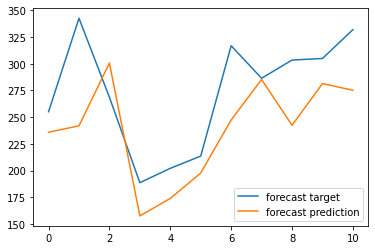

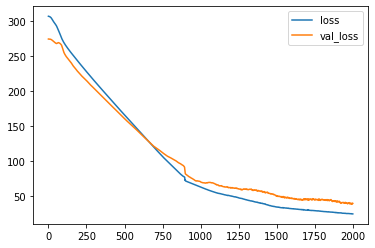

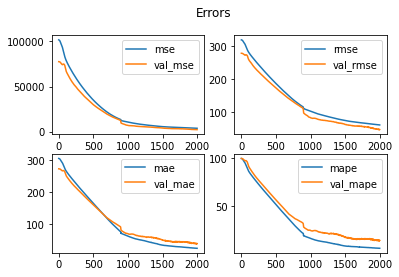

In [17]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 1, trainDFScaled, testDFScaled, trainDF, testDF)
#trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:]
validation_predictions = saved_model.predict(testXScaled[:,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)